# Импорты

In [ ]:
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams

In [ ]:
# os.chdir(r'/kaggle/working')
# from IPython.display import FileLink

In [ ]:
# FileLink(r'train_text_new.csv')

In [ ]:
sns.set_style('darkgrid')
sns.set_context('paper')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [ ]:
import string
import re
import nltk


from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
# sns.set_style('darkgrid')
# plt.rcParams['figure.figsize'] = (17,7)
# plt.rcParams['font.size'] = 18

True

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
sns.set_context('paper')

In [ ]:
# import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"

# Считывание данных, просмотр их структуры

In [ ]:
# df = pd.read_csv('D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\goodreads_train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BooksReview/goodreads_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/BooksReview/goodreads_test.csv')

In [ ]:
# df_test = pd.read_csv('/kaggle/input/goodreads/goodreads_test.csv')

In [ ]:
# df_test = pd.read_csv('D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\goodreads_test.csv')

In [ ]:
df.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0


In [ ]:
print('Размер train датасета:', df.shape)
print('Размер test датасета:', df_test.shape)

Размер train датасета: (900000, 11)
Размер test датасета: (478033, 10)


In [ ]:
print('Информация о train датасете\n')
df.info()

print('Информация о test датасете\n')
df_test.info()

Информация о train датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB
Информация о test датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478033 entries, 0 to 478032
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       478033

Посмотрим, есть ли вообще дублированный текст отзывов.

In [ ]:
print('Количество дубликатов в train датасете', df.duplicated(['book_id','review_text','rating']).sum())
print('Количество дубликатов в test датасете', df_test.duplicated(['book_id','review_text']).sum())

Количество дубликатов в train датасете 42
Количество дубликатов в test датасете 33


In [ ]:
df.drop_duplicates(subset=['book_id','review_text','rating'])

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0


In [ ]:
df_test.drop_duplicates(subset=['book_id','review_text'])

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0
...,...,...,...,...,...,...,...,...,...,...
478028,35cef391b171b4fca45771e508028212,15745950,0e1db3d4b04256f9660f5d276ddf1314,Can't wait for Travis' POV \n Travis Before Ab...,Sun Aug 05 10:26:12 -0700 2012,Tue Apr 16 17:24:00 -0700 2013,Tue Apr 16 00:00:00 -0700 2013,NaN,0,0
478029,35cef391b171b4fca45771e508028212,10861195,0b7f352e58caf0fd1f961e98ef04e89c,Had this on my to-read shelf forever. Will upd...,Tue Jul 10 23:31:00 -0700 2012,Fri Dec 28 20:05:51 -0800 2012,NaN,NaN,0,0
478030,35cef391b171b4fca45771e508028212,6131164,9b19eff33ddb14e9e68fca2e90379e46,The last book left me wanting for more. I need...,Tue Jul 10 19:45:17 -0700 2012,Mon Mar 25 18:41:51 -0700 2013,Tue Mar 19 00:00:00 -0700 2013,NaN,0,0
478031,35cef391b171b4fca45771e508028212,10025305,8be463fed78f0da63e964706f710332b,Things are heating up in the second novel of I...,Thu Jul 05 19:19:30 -0700 2012,Thu Jan 24 16:24:54 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,NaN,0,0


In [ ]:
print('Количество уникальных отзывов в train', len(df['review_id'].unique()))
print('Количество уникальных пользователей в train', len(df['user_id'].unique()))
print('Количество уникальных книг в train', len(df['book_id'].unique()))

print('Количество уникальных отзывов в test', len(df_test['review_id'].unique()))
print('Количество уникальных пользователей в test', len(df_test['user_id'].unique()))
print('Количество уникальных книг в test', len(df_test['book_id'].unique()))

Количество уникальных отзывов в train 900000
Количество уникальных пользователей в train 12188
Количество уникальных книг в train 25474
Количество уникальных отзывов в test 478033
Количество уникальных пользователей в test 6705
Количество уникальных книг в test 25399


In [ ]:
print('Количество пустых значений в train датасете')
df.isna().sum()

Количество пустых значений в train датасете


user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [ ]:
print('Количество пустых значений в test датасете')
df_test.isna().sum()

Количество пустых значений в test датасете


user_id              0
book_id              0
review_id            0
review_text          0
date_added           0
date_updated         0
read_at          42478
started_at      143044
n_votes              0
n_comments           0
dtype: int64

Видим, что пустые значения есть только в колонках с датой начала и конца чтения, что свидетельствует о том, что в целом не все пользователи заполняют эти поля и мало кто отслеживает. Из дат можно вытащить колво дней,за которое читалась книга. Для значений NaN проставить среднее.

# Распределение целевой переменной

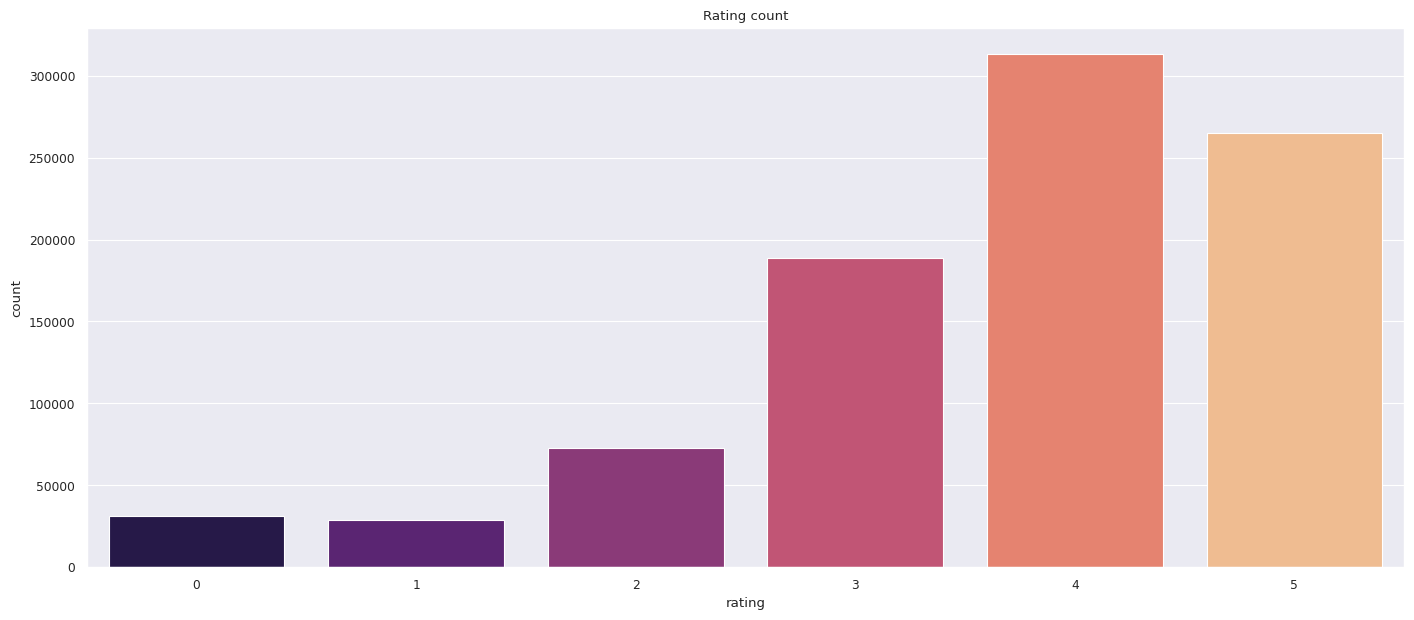

In [ ]:
sns.countplot(x = 'rating', data = df, palette = 'magma')
plt.title('Rating count')
plt.show()

Видим, что чаще всего ставят оценку 4, оценки 0 и 1 встречаются практически одинаковое количество раз и очень редко (~25к каждый) => 
достаточно маленький процент пользователей дает плохуй оценку книгам, возможно многие боятся ставить высокую оценку, 
поэтому, выбирают 4.

Посмотрим точный процент всех отметок от общего числа

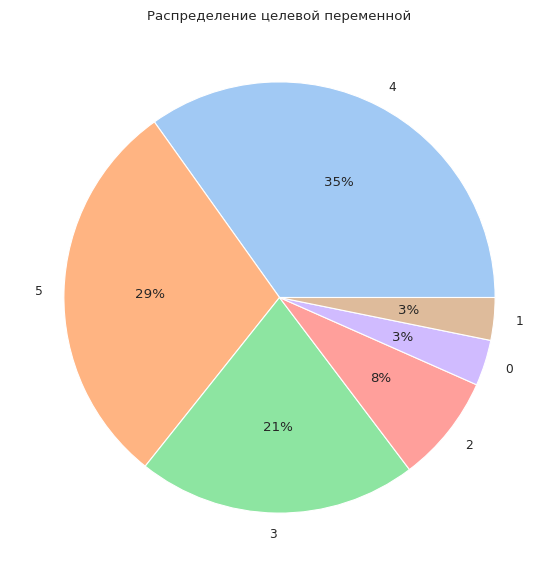

In [ ]:
colors = sns.color_palette('pastel')[0:6]
data = df['rating'].value_counts()
labels = data.index

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Распределение целевой переменной')
plt.show()

Видим, что у нас крайне несбалансированные данные, большее количество значений распределено между более высокими рейтингами - 3,4 и 5.

# EDA

Возможные гипотезы и в целом мысли:
 - какие-то пользователи могут в целом ставить высокие или низкие оценки всем книгам, нельзя сразу выкидывать из датасета айдишник пользователя, нужно посмотреть соотношение
 - можно посмотреть на айдишники книг, какие-то могут получать в целом плохие/хорошие отзывы => тогда если встретим в тесте айдишник на котором уже обучались, можем знать, какую оценку ставить
 - из дат начала и конца чтения можно вытащить колво дней, которое уходит а чтение книги.
 - для значений NaN дат начала и конца чтения можно проставить среднее время,за которое читается эта книга или среднее,за которое читает пользователь.
 - колво войтсов играет роль, тк люди могли прочитать плохой/хороший отзыв, лайкнуть его, прочитать книгу и тоже оставить плохой/хороший отзыв и соответствующую оценку (т.е. отзывы с большим колвом войтсов оказывают влияние на рейтинг книги в последующем)
 - семантическая окраска отзыва играет значение -> провести анализ на семантику
 - посмотреть на длину отзыва в целом, среднюю длину предложения, слова и колво слов в предложении, все это может играть роль при выставлении рейтинга
 

## Анализ и добавление новых числовых и категориальных признаков

Посмотрим на пересчение по пользователям в train и test датасетах, чтобы понять, стоит ли тратить время и ресурсы на проверку первой гипотезы. Аналогично со второй.

In [ ]:
print('Пользователи в обоих датасетах')
np.intersect1d(df["user_id"].unique(), df_test["user_id"].unique())

Пользователи в обоих датасетах


array(['b9450d1c1f97f891c392b1105959b56e'], dtype=object)

In [ ]:
print('Колво строк в test датасете с общим пользователем')
df[df['user_id'] == np.intersect1d(df["user_id"].unique(), df_test["user_id"].unique())[0]].count()[0]

Колво строк в test датасете с общим пользователем


42

Видим, что всего один пользователь присутствует в обоих датасетах и в test с ним не так уж много строк. Не будем тратить время на работу с пользователями.

In [ ]:
print('Книги в обоих датасетах', len(np.intersect1d(df["book_id"].unique(), df_test["book_id"].unique())))
print(np.intersect1d(df["book_id"].unique(), df_test["book_id"].unique()))

Книги в обоих датасетах 25398
[       1        2        3 ... 36252773 36307629 36328685]


А вот по книгам достаточно большое пересечение, можно поработать с этим. 

Дропнем колонку с айди отзыва, тк она в себе не несет никакой информативной ценности,поскольку на уникальность мы уже датасет проверили.

In [ ]:
df = df.drop(columns = ['review_id'])
df_test = df_test.drop(columns = ['review_id'])
df.head(3)

,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0


Посмотрим для начала на мини тепловую карту датасета, может быть какие-то колонки коррелируют между собой.

<Axes: >

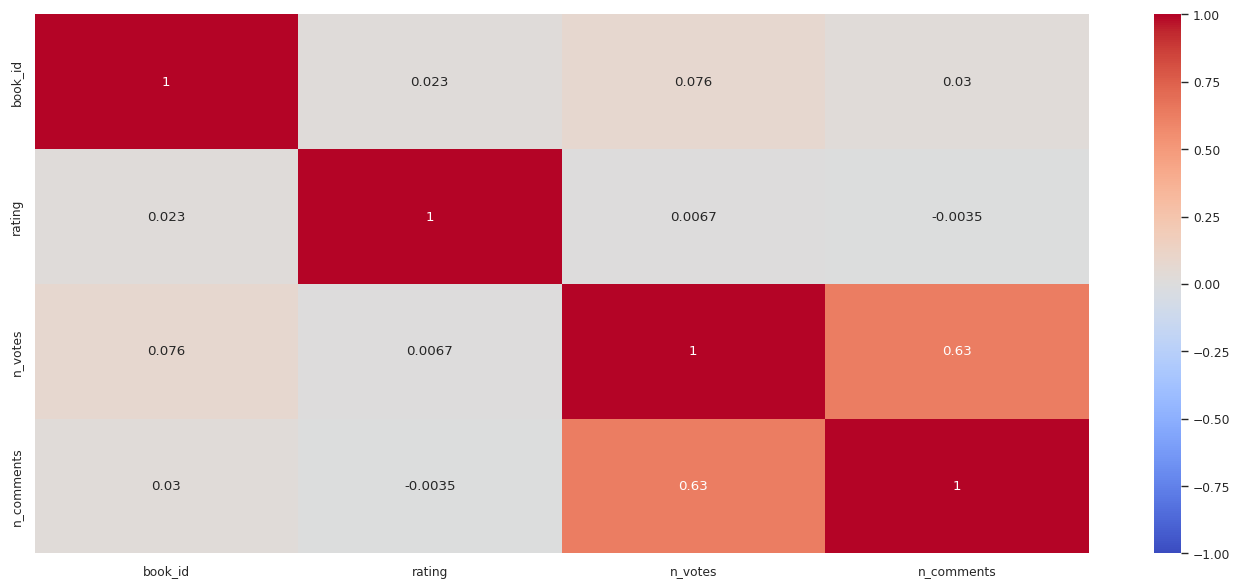

In [ ]:
sns.heatmap(df[['book_id', 'rating', 'n_votes', 'n_comments']].corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Видим, что колво войтсов и комментариев коррелируют между собой. Посмотрим внимательнее на значения комментарией и войтсов.

In [ ]:
print('Количество отрицательных n_votes',df[df['n_votes'] < 0].count()[0])
print('Количество отрицательных n_comments',df[df['n_comments'] < 0].count()[0])

Количество отрицательных n_votes 46
Количество отрицательных n_comments 8


Отрицательные n_votes можно считать за дизлайки, но непонятно, что делать с отрицательными n_comments. Учитывая еще тепловую карту, можем дропнуть n_comments.

In [ ]:
df = df.drop(columns = ['n_comments'])
df_test = df_test.drop(columns = ['n_comments'])

Посмотрим на зависимость рейтинга от колва войтсов

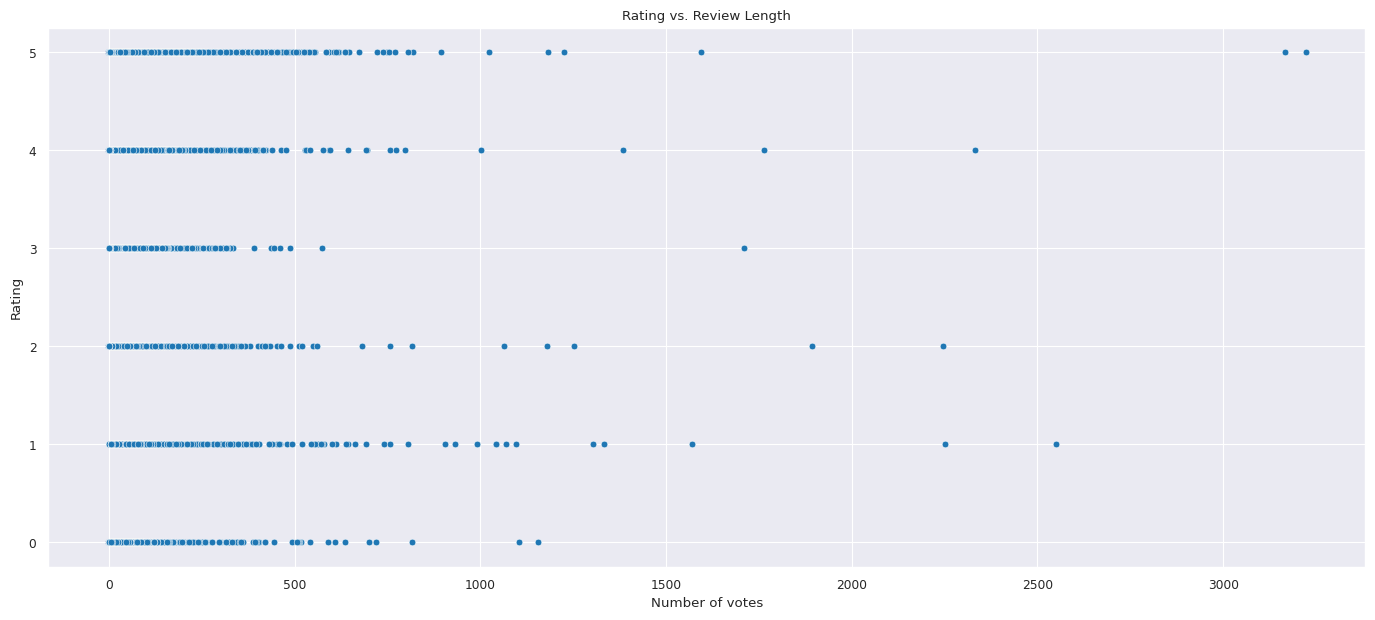

In [ ]:
sns.scatterplot(x=df['n_votes'], y=df['rating'])
plt.xlabel('Number of votes')
plt.ylabel('Rating')
plt.title('Rating vs. Review Length')
plt.show()

Видно, что для рейтингов 1 и 5 очень часто ставят войтсы, значения на графике расположены плотно друг к другу и их достаточно много. Самые залайканные - отзывы с рейтингом 5, 1, 2.

Посчитаем теперь колво дней, за которое читал каждую книгу каждый пользователь.

In [ ]:
df['started_at_dt'] = pd.to_datetime(df.started_at) 
df['read_at_dt'] = pd.to_datetime(df.read_at) 
df['duration_dt'] = df.read_at_dt - df.started_at_dt 
df['read_length_days'] = df.duration_dt.dt.days 

KeyboardInterrupt: ignored

In [ ]:
df_test['started_at_dt'] = pd.to_datetime(df.started_at) 
df_test['read_at_dt'] = pd.to_datetime(df.read_at) 
df_test['duration_dt'] = df.read_at_dt - df.started_at_dt 
df_test['read_length_days'] = df.duration_dt.dt.days 

In [ ]:
df = df.drop(columns = ['started_at_dt', 'read_at_dt', 'duration_dt', ])
df_test = df_test.drop(columns = ['started_at_dt', 'read_at_dt', 'duration_dt', ])

In [ ]:
# df_new = df.to_csv(r'/content/drive/MyDrive/BooksReview/df_new.csv', index= False)
# with open('/content/drive/MyDrive/BooksReview/df_new.csv', 'w') as f:
#   f.write(df_new)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/BooksReview/df_new.csv')

In [ ]:
df.sample(5, random_state = 42)

Посмотрим, сколько NaN значений теперь в колонке длительности чтения.

In [ ]:
df.isna().sum()[-1]

Посмотрим на распределние колва дней чтения и зависимость рейтинга от колва дней чтения

In [ ]:
plt.subplot(1,2,1)
sns.kdeplot(x = df['read_length_days'])
plt.legend(df['rating'].unique())
plt.xlabel('')
plt.ylabel('')

plt.show()

In [ ]:
sns.scatterplot(x=df['read_length_days'], y=df['rating'])
plt.xlabel('Number of days reading')
plt.ylabel('Rating')
plt.title('Rating vs.Number of days reading')
plt.show()

Книги с более высоким рейтингом читаются больше и дольше. Плотность распределения значения выше. Также видим, что есть отрицательное колво дней, посмотрим, сколько таких значений.

In [ ]:
df[df['read_length_days'] < 0].count()[0]

In [ ]:
df['read_length_days'].value_counts()

In [ ]:
df['read_length_days'].value_counts()
dic = df['read_length_days'].value_counts()
dic.items()

Посмотрим, за какое колво дней в целом чаще читают книги

In [ ]:
def plot_top_reading_length(data): 
    dic = data.value_counts()
           
    top = sorted(dic.items(), key = lambda x: x[1], reverse=True)[:10] 
    x, y = zip(*top)

    fig, ax = plt.subplots()
    ax.bar(x,y)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel('Number of days reading')
    plt.ylabel('Frequency')
    plt.title('Frequency vs.Number of days reading')

In [ ]:
plot_top_reading_length(df['read_length_days'])

Чаще всего книги читают за день, поэтому заполним значения NaN и отрицательные значения единичками.

In [ ]:
df['read_length_days'] = df['read_length_days'].fillna(1)
df[df['read_length_days'] < 0] = 1

df_test['read_length_days'] = df_test['read_length_days'].fillna(1)
df_test[df_test['read_length_days'] < 0] = 1

print('Колво отрицательных значений read_length_days', df[df['read_length_days'] < 0].count()[0])
df.isna().sum()

In [ ]:
# df = pd.read_csv('/kaggle/input/new-goodreads/new_train.csv')
# df.head(3)

In [ ]:
#df_new = df.to_csv(r'/content/drive/MyDrive/BooksReview/df_new.csv', index= False) #сохраним измененный датасет

In [ ]:
# sns.heatmap(df[['book_id', 'rating', 'n_votes', 'n_comments', 'read_length_days']].corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
df.to_csv('/content/drive/MyDrive/BooksReview/goodreads_train_upd.csv', index= False)
df_test.to_csv('/content/drive/MyDrive/BooksReview/goodreads_test_upd.csv', index= False)

## Анализ отзывов

- посчитаем для каждого отзыва его длину, кол-во слов. среднюю длину предложения и среднюю длину слова
- почистим отзывы: удалим ссылки, цифры, стоп-слова
- приведем все отзывы к нижнему регистру, лемматизируем
- посмотрим на эмоциональную окраску каждого отзыва
- посмотрим присутствуют ли спойлеры в отзывах, проставим 1 или 0 соответственно
- мб удалим слишком короткие отзывы или неинформативные отзывы



In [ ]:
# df_new = pd.read_csv(r'D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\new_train.csv')

In [ ]:
df_test_text = df_test[['review_text']]
df_text = df[['review_text']]


In [ ]:
# test_text = df_test_text.to_csv('/kaggle/working/test_text.csv', index = False)

In [ ]:
# df_new = pd.read_csv('/content/drive/MyDrive/BooksReview/new_train.csv')

In [ ]:
# df_new.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,started_at_dt,read_at_dt,duration_dt,read_length_days
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,2017-08-15 13:23:18-07:00,2017-08-26 12:05:52-07:00,10 days 22:42:34,10.0
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,NaN,NaN,NaN,1.0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,2017-03-17 23:45:40-07:00,2017-03-18 23:22:42-07:00,0 days 23:37:02,0.0


In [ ]:
# df_text = df_new[['rating', 'review_text']]

In [ ]:
df_text.sample(5, random_state = 42)

,review_text
527984,I'm proudly telling you that I'm a big fan of ...
618093,"4.25 stars \n This was so, so much better than..."
484217,For some reason finding a good male lead urban...
161123,It's about the son of a pepper merchant who fi...
718642,the most beautiful display of emotions in this...


In [ ]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_text  900000 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [ ]:
df_text['review_text'].sample(5, random_state = 42)

527984    I'm proudly telling you that I'm a big fan of ...
618093    4.25 stars \n This was so, so much better than...
484217    For some reason finding a good male lead urban...
161123    It's about the son of a pepper merchant who fi...
718642    the most beautiful display of emotions in this...
Name: review_text, dtype: object

Добавим колонку с длиной отзыва

In [ ]:
df_text['review_length'] = df_text['review_text'].str.len()
df_test_text['review_length'] = df_test_text['review_text'].str.len()
df_text.head(3)

,review_text,review_length
0,This is a special book. It started slow for ab...,2119.0
1,Recommended by Don Katz. Avail for free in Dec...,93.0
2,"A fun, fast paced science fiction thriller. I ...",2598.0


Теперь посчитаем колво слов в каждом отзыве

In [ ]:
def word_count(text):
    review_words = text.split()
    return len(review_words)

In [ ]:
df_text['word_count'] = df_text['review_text'].apply(word_count)
df_test_text['word_count'] = df_test_text['review_text'].apply(word_count)

AttributeError: ignored

In [ ]:
df_text.head(3)

Посчитаем среднюю длину слова в отзыве.

In [ ]:
# def plot_word_number_histogram(text):
#     text.str.split().
#         map(lambda x: len(x)).\
#         hist()

In [ ]:
# df['word_count'] = df['review_text'].str.split().map(lambda x: len(x))
# df.head(3)

In [ ]:
df_text['mean_word_length'] = df_text['review_text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df_test_text['mean_word_length'] = df_test_text['review_text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

df_text.head(3)

Посчитаем среднюю длину предложения в отзыве

In [ ]:
df_text['mean_sent_length'] = df_text['review_text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df_test_text['mean_sent_length'] = df_test_text['review_text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

df_text.head(3)

Посмотрим на графики.

In [ ]:
def plotting_bars(col, rate):
    plt.subplot(1,2,1)
    sns.barplot(x = 'rating', y = col, data = df_text.groupby('rating', as_index=False)[col].mean(), palette = 'magma')
    plt.title('Rating vs ' + str(col))
    plt.ylabel(col, labelpad=12.5)
    plt.xlabel('rating', labelpad=12.5)
    
    plt.show()

In [ ]:
features = ['review_length','word_count','mean_word_length','mean_sent_length']
for feature in features:
    plotting_bars(feature, 'rating')

Видим, что в среднем для всех рейтингов длина слова окло 4х -> пользователи чаще используют короткие слова ? это не так, если много стоп-слов, тк они короткие, посмотрим, какие стоп-слова встречаются часто. Пока что мало что по длине слов мало можно сказать о рейтинге. Длина предложения для рейтинга 3 больше всего. Для рейтинга 0 в целом все не очень, маленькие отзывы,маленькие предложения и небольшое кол-во слов (относительно других рейтингов) -> 0 будет проще классифицировать наверное. 

In [ ]:
df_text.to_csv('/content/drive/MyDrive/BooksReview/train_text.csv', index = False)
df_test_text.to_csv('/content/drive/MyDrive/BooksReview/test_text.csv', index = False)

In [ ]:
# df_text = pd.read_csv('/content/drive/MyDrive/BooksReview/text_train.csv')

In [ ]:
# df_text = pd.read_csv('/kaggle/input/new-goodreads/text_train.csv')

In [ ]:
# df_text.to_csv('D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\train_text.csv', index = False)

In [ ]:
from collections import defaultdict
stop=set(stopwords.words('english'))
stop_words = stopwords.words('english')

Посмотрим, какие стоп - слова чаще всего встечаются в отзывах.

In [ ]:
# функция подсчета стоп-слов
def stop_words_count(text):
    corpus=[]
    new = text.str.split()
    new = new.values.tolist()
    corpus=[word for i in new for word in i]

    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1
    return dic

In [ ]:
# def plot_top_stopwords_barchart(text):
#     dic = stop_words_count(text)
#     top = 

In [ ]:
dic = stop_words_count(df_text['review_text'])
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)

In [ ]:
top[:20]

In [ ]:
# def plot_top_stopwords_barchart(text): 
#     #dic = stop_words_count(text)
           
#     top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
#     x,y=zip(*top)
#     plt.subplot(1,1,1)
#     plt.bar(x=x, y=y, height = 100000)
#     plt.title('Top 10 most common stop-words')
#     plt.ylabel('Frequency', labelpad=12.5)
#     plt.xlabel('Stop-word', labelpad=12.5)
    
#     plt.show()

    #plt.bar(x,y)
    # plt.title('Top 10 most common stop-words')
    # plt.ylabel('Frequency', labelpad=12.5)
    # plt.xlabel('Stop-word', labelpad=12.5)



In [ ]:
# plot_top_stopwords_barchart(df_text['review_text'])

In [ ]:
def plot_top_non_stopwords_barchart(text):   
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x = y,y = x)

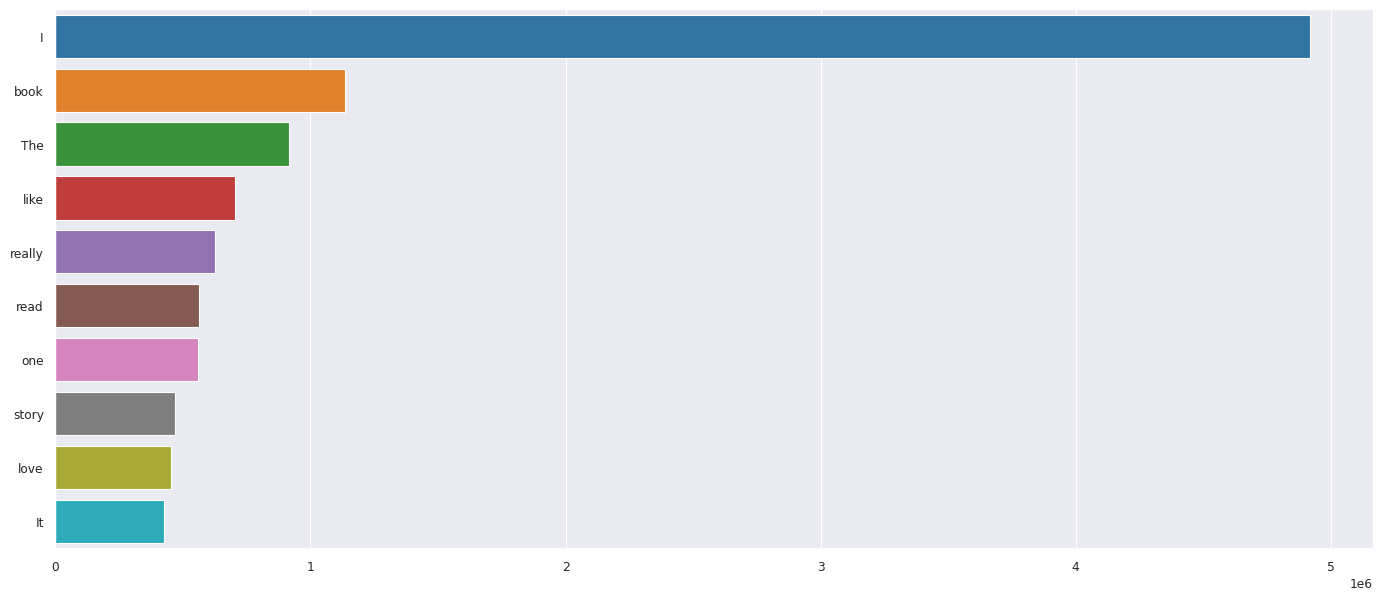

In [ ]:
# plot_top_non_stopwords_barchart(df_text['review_text'])

Посмотрим на n-gramms.

In [ ]:
from nltk.util import ngrams

In [ ]:
# def get_top_ngram(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx])
#                   for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:10]

In [ ]:
# def plot_top_ngrams_barchart(text, n=2):
#     stop=set(stopwords.words('english'))

#     new= text.str.split()
#     new=new.values.tolist()
#     corpus=[word for i in new for word in i]

#     def _get_top_ngram(corpus, n=None):
#         vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
#         bag_of_words = vec.transform(corpus)
#         sum_words = bag_of_words.sum(axis=0) 
#         words_freq = [(word, sum_words[0, idx]) 
#                       for word, idx in vec.vocabulary_.items()]
#         words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#         return words_freq[:10]

#     top_n_bigrams=_get_top_ngram(text,n)[:10]
#     x,y=map(list,zip(*top_n_bigrams))
#     sns.barplot(x=y,y=x)

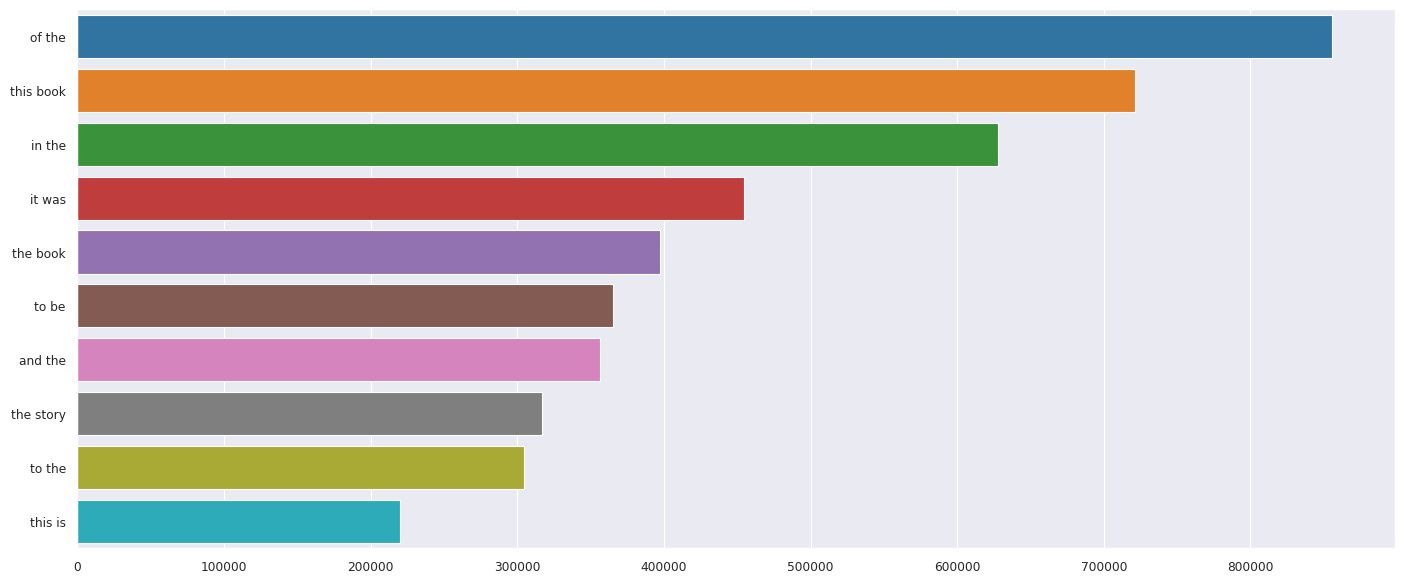

In [ ]:
# plot_top_ngrams_barchart(df_text['review_text'],2)

Проставим наличие/отстутсвие спойлеров у отзыва.

In [ ]:
def if_spoiler(text):
    spoil_statement = 'spoiler alert'
    return [1 if spoil_statement in txt else 0 for txt in text]

In [ ]:
# spoil_statement = 'spoiler alert'
df_text['spoil'] = if_spoiler(df_text['review_text'])
df_test_text['spoil'] = if_spoiler(df_test_text['review_text'])

df_text[df_text['spoil'] == 1]


In [ ]:
# df_test_text.to_csv(r'/kaggle/working/test_text_new.csv', index = False)
# df_text.to_csv('/kaggle/working/train_text_new.csv', index = False)

Теперь удалим спойлеры. Также приведем все к нижнему регистру, удалим линки, цифры и лишние символы, лемматизируем и токенизируем. Затем добавим эмоциональную окраску.

Сначала сделаем по-тупому через функции, потом засуну это в пайплайн...

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def remove_spoiler_alert(text):
    return re.sub(r'(\(view spoiler\).*?\(hide spoiler\))','',text)

In [ ]:
def to_lower(text):
    return text.lower()

In [ ]:
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split(' ') if word not in stop])

In [ ]:
def clean_text(text):
    text = text.lower()
    regular = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]'
    regular_url = r'(http\S+)|(www\S+)|([\w\d]+www\S+)|([\w\d]+http\S+)'
    text = re.sub(r'(\(view spoiler\).*?\(hide spoiler\))','',text)
    text = re.sub(regular, '', text)
    text = re.sub(regular_url, r'URL', text)
    text = re.sub(r'(\d+\s\d+)|(\d+)',' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [ ]:
def cleaned(data):
    stopwords_cleaned = []
    cleaned_text = []
    tokens = []
    for text in data:
    # cleaning  
        text = clean_text(text)
        cleaned_text.append(text)
     
    # tokenization
        text = word_tokenize(text)
        tokens.append(text)
     
    # с помощью цикла for поочередно проверяем каждое слово(токен) текущего сообщения
    # на вхождение в список стоп-слов. Если токен не является стоп-словом, 
    # то добавляем его в список stopwords_cleaned  
        text = [word for word in text if word not in stop_words]
        stopwords_cleaned.append(text)
    return cleaned_text, tokens, stopwords_cleaned

In [ ]:
df_text['cleaned_rev'], df_text['tokens_rev'], df_text['noStopwords_rev']= cleaned(df_text['review_text'])
df_test_text['cleaned_rev'], df_test_text['tokens_rev'], df_test_text['noStopwords_rev']= cleaned(df_test_text['review_text'])
# data['tokens_rev'] = tokens
 
# Сохраняем сообщения без стоп-слов в новой колонке 'noStopwords_msg'
# data['noStopwords_rev'] = stopwords_cleaned

In [ ]:
df_text.sample(5, random_state = 42)

In [ ]:
def preprocess_reviews(data):
    corpus=[]
    # stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for reviews in data:
        words=[w for w in word_tokenize(reviews) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

In [ ]:
corpus_train = preprocess_reviews(df_text['review_text'])
corpus_test = preprocess_reviews(df_test_text['review_text'])

In [ ]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df_text['polarity_score']=df_text['review_text'].apply(lambda x : polarity(x))
df_test_text['polarity_score']=df_text['review_text'].apply(lambda x : polarity(x))

In [ ]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

In [ ]:
df_text['polarity']=df_text['polarity_score'].map(lambda x: sentiment(x))
df_test_text['polarity']=df_test_text['polarity_score'].map(lambda x: sentiment(x))

In [ ]:
df_text.to_csv('/content/drive/MyDrive/BooksReview/train_text_upd.csv', index = False)
df_test_text.to_csv('/content/drive/MyDrive/BooksReview/test_text_upd.csv', index = False)

In [ ]:
# dic=gensim.corpora.Dictionary(corpus)
# bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
# lda_model = gensim.models.LdaMulticore(bow_corpus,
#                                    num_topics = 4,
#                                    id2word = dic,
#                                    passes = 10,
#                                    workers = 2)
# lda_model.show_topics()

In [ ]:
# stop_words = stopwords.words('english')
# # создаем список для хранения данных без стоп-слов
# stopwords_cleaned = []
 
# # для каждого сообщения text из столбца data['Message']
# for text in data['Message']:
#     # cleaning  
#     text = clean_text(text)
#     cleaned_text.append(text)
     
#     # tokenization
#     text = word_tokenize(text)
#     tokens.append(text)
     
#     # с помощью цикла for поочередно проверяем каждое слово(токен) текущего сообщения
#     # на вхождение в список стоп-слов. Если токен не является стоп-словом, 
#     # то добавляем его в список stopwords_cleaned  
#     text = [word for word in text if word not in stop_words]
#     stopwords_cleaned.append(text)
 
# data['Cleaned_msg'] = cleaned_text
# data['Tokens_msg'] = tokens
 
# # Сохраняем сообщения без стоп-слов в новой колонке 'noStopwords_msg'
# data['noStopwords_msg'] = stopwords_cleaned

In [ ]:
# def ratings(rating):
#     if rating > 2 and rating <= 5:
#         return 1
#     if rating > -1 and rating < 3:
#         return 0

In [ ]:
# data['rate'] = data['rating'].apply(ratings)
# data.head(5)

In [ ]:
# def plotting(col, rate):
#     plt.figure(figsize=(10, 12))
#     plt.subplot(1,2,1)
#     sns.boxplot(y = data[col], hue = data[rate])
#     plt.ylabel(col, labelpad=12.5)
    
#     plt.subplot(1,2,2)
#     sns.kdeplot(x = data[col], hue = data[rate])
#     plt.legend(data[rate].unique())
#     plt.xlabel('')
#     plt.ylabel('')
    
#     plt.show()

In [ ]:
# features = ['review_length','word_count','mean_word_length','mean_sent_length']
# for feature in features:
#     plotting(feature, 'rate')

In [ ]:
# for feature in features:
#     plotting(feature, 'rating')

In [ ]:
# df['review_length'].hist()

Видим, что в основном отзывы имеют длину от 0 до  8к, преимущественно от 0 до 2к символов

In [ ]:
# cols = ['n_votes','n_comments','review_length','word_count','mean_word_length','mean_sent_length']
# fig, axes = plt.subplots(2, 3)
# plt.figure(figsize=(25, 25))
# # rcParams['figure.figsize'] = 30, 20
# j = 0
# for i, col in enumerate(cols):
#     if j == 3:
#         j = 0
#     df[df['rating']==0][col].hist()
#     sns.boxplot(data = df[col], palette = 'magma',ax = axes[i//3, j]).set(title = 'rating vs ' + col)
#     j += 1    